In [198]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}'
mpl.rc('font', family='serif')

In [199]:
os.getcwd()
save_path = os.path.join(os.getcwd(), "..", "save", "experiments")
filenames = []
for filename in os.listdir(save_path):
    if filename.startswith("baseline-vary-m") and filename.endswith(".csv"):
        filenames.append(filename)

Read data

In [200]:
datasets = []
for filename in filenames:
    path = os.path.join(save_path, filename)
    if os.path.exists(path):
        data = pd.read_csv(os.path.join(save_path, filename)).dropna(axis=0)
        data.sort_values(by="T", inplace=True)
        datasets.append(data)

prepare plot data

In [201]:
def get_hist_data(data, percentile=100):
    ts = data["tsMeasured"][data["target"] == 5]
    t1 = data["t1Measured"][data["target"] == 5]
    return ts[ts < np.percentile(ts, percentile)], t1[t1 < np.percentile(t1, percentile)]

def get_time_over_iterations(data, percentile=100):
    data = data[data["experimentRepetition"] == 0][data["round"] == 3][data["target"] == 1]
    ts = data["tsMeasured"]
    t1 = data["t1Measured"]
    T = data["T"]
    return T[ts < np.percentile(ts, percentile)], ts[ts < np.percentile(ts, percentile)], t1[ts < np.percentile(ts, percentile)]

In [202]:
def add_data_to_plot(ax, data, percentile=100):
    palette = sns.cubehelix_palette(n_colors=2)
    ts, t1 = get_hist_data(data, percentile=percentile)
    print(len(ts))
    print(len(t1))
    # ts = np.random.choice(ts, 250, replace=False)
    # t1 = np.random.choice(t1, 250, replace=False)
    sns.histplot(ts, ax=ax, color=palette[0], label="ts", stat="density")
    sns.histplot(t1, ax=ax, color=palette[1], label="t1", stat="density")

No handles with labels found to put in legend.


35
35


IndexError: list index out of range

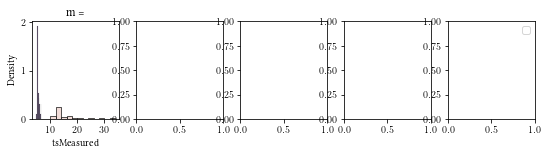

In [203]:
fig, axes = plt.subplots(1, 5, figsize=(9, 1.8), sharey=False, sharex=False)
for i, data in enumerate(datasets):
    ax = axes[i]
    add_data_to_plot(ax, data, percentile=90)
plt.legend()
for i, ax in enumerate(axes):
    ax.set_title("m = {}".format(filenames[i].split("-")[1][:-4]))
path = os.path.join(os.getcwd(), "save", "time_model.pdf")
plt.tight_layout()
plt.savefig(path)

In [204]:
datasets = []
for filename in filenames:
    path = os.path.join(save_path, filename)
    if os.path.exists(path):
        data = pd.read_csv(os.path.join(save_path, filename)).dropna(axis=0)
        data.sort_values(by="T", inplace=True)
        datasets.append(data)
large_df = pd.concat(datasets, ignore_index=True)
large_df["quotient"] = large_df["tsMeasured"] / large_df["t1Measured"]
print(large_df)

      experimentRepetition  round  target    result  variance   quality  \
0                      0.0    2.0     0.0  0.578927  0.101891  0.052568   
1                      0.0    2.0     1.0  0.546985  0.115418  0.052568   
2                      0.0    2.0     2.0  0.752617  0.065502  0.052568   
3                      0.0    2.0     3.0  0.727651  0.095538  0.052568   
4                      0.0    2.0     4.0  0.615532  0.095708  0.052568   
...                    ...    ...     ...       ...       ...       ...   
7405                   0.0   39.0   137.0  0.517406  0.088310  0.904878   
7406                   0.0   39.0   137.0  0.517406  0.088310  0.904878   
7407                   0.0   39.0   167.0  0.657433  0.092179  0.897038   
7408                   0.0   40.0    32.0  0.438762  0.078997  0.910686   
7409                   0.0   40.0   167.0  0.656398  0.092790  0.908407   

       utility  totalIterations          T       M     m  tsMeasured  \
0     0.157854           28

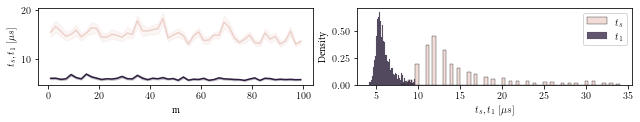

<Figure size 432x288 with 0 Axes>

In [225]:
fig, axes = plt.subplots(1, 2, figsize=(9, 1.8))
palette = sns.cubehelix_palette(n_colors=2)
sns.lineplot(data=large_df[large_df["tsMeasured"] < np.percentile(large_df["tsMeasured"], 95)],
                x="m", y="tsMeasured", color=palette[0], ax=axes[0])
sns.lineplot(data=large_df[large_df["t1Measured"] < np.percentile(large_df["t1Measured"], 95)],
                x="m", y="t1Measured", color=palette[1], ax=axes[0])
sns.histplot(data=large_df[large_df["tsMeasured"] < np.percentile(large_df["tsMeasured"], 95)]["tsMeasured"],
             color=palette[0], ax=axes[1], label=r"$t_s$", stat="density")
sns.histplot(data=large_df[large_df["t1Measured"] < np.percentile(large_df["t1Measured"], 95)]["t1Measured"],
             color=palette[1], ax=axes[1], label=r"$t_1$", stat="density")
plt.ylim(bottom=0)
axes[0].set_ylabel(r"$t_s, t_1$ $[\mu s]$")
axes[1].set_xlabel(r"$t_s, t_1$ $[\mu s]$")
path = os.path.join(os.getcwd(), "save", "time_model.pdf")
plt.tight_layout()
plt.legend()
plt.savefig(path)
plt.show()
plt.clf()

In [192]:
print(np.median(large_df["tsMeasured"]))
print(np.median(large_df["t1Measured"]))
print(np.median(large_df["tsCalculated"]))
print(np.median(large_df["t1Calculated"]))

13.0
5.8
18.485294117647058
5.428571428571429


In [196]:
print(np.mean(large_df["tsMeasured"]))
print(np.mean(large_df["t1Measured"]))
print(np.mean(large_df["tsCalculated"]))
print(np.mean(large_df["t1Calculated"]))

17.429554655870444
6.287503670504843
26.276623752559882
5.749798349315893


In [197]:
print(np.var(large_df["tsMeasured"]))
print(np.var(large_df["t1Measured"]))
print(np.var(large_df["tsCalculated"]))
print(np.var(large_df["t1Calculated"]))

269.2328917045026
2.6886094823661586
111972.6990476821
32.21537505345826


In [ ]:


#

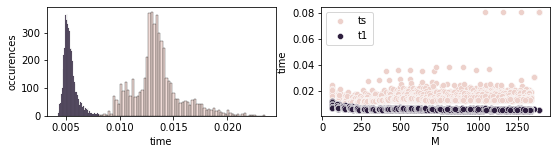

In [16]:
os.getcwd()
save_path = os.path.join(os.getcwd(), "..", "save", "experiments")
filename = "anygrad-sa-1rep.csv"

Read data

In [20]:
data = pd.read_csv(os.path.join(save_path, filename)).dropna(axis=0)
data

,experimentRepetition,round,target,result,variance,quality,utility,totalIterations,T,M,m,tsMeasured,t1Measured,tsCalculated,t1Calculated
380,0.0,2.0,0.0,0.616791,0.078570,0.102372,0.233582,5730.0,46.446,60.0,30.0,0.022539,0.009750,0.110000,0.006400
381,0.0,2.0,1.0,0.529684,0.081137,0.102372,0.059367,5760.0,46.621,60.0,30.0,0.013039,0.008525,0.099000,0.004300
382,0.0,2.0,3.0,0.705923,0.102025,0.102372,0.411845,5820.0,46.974,60.0,30.0,0.010539,0.008575,0.045000,0.006500
383,0.0,2.0,6.0,0.474855,0.085621,0.102372,-0.050290,5910.0,47.497,60.0,30.0,0.011039,0.008625,0.039000,0.006800
384,0.0,2.0,10.0,0.801534,0.075723,0.102372,0.603068,6030.0,48.193,60.0,30.0,0.010039,0.007950,0.029000,0.006800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5505,0.0,26.0,169.0,0.795739,0.087343,0.900858,0.591479,242113.0,1363.614,1284.0,53.0,0.012893,0.004730,-0.301533,0.011430
5506,0.0,27.0,187.0,0.387959,0.067469,0.906069,-0.224081,247634.0,1392.890,1314.0,50.0,0.012692,0.005173,0.255788,0.000973
5507,0.0,26.0,170.0,0.602647,0.083360,0.904363,0.205295,242166.0,1363.882,1304.0,53.0,0.013493,0.004864,-0.217643,0.009652
5508,0.0,28.0,188.0,0.496824,0.083850,0.903151,-0.006352,248198.0,1396.372,1297.0,50.0,0.012709,0.005211,-0.110529,0.008118


In [21]:
tsMeasured = data["tsMeasured"]
t1Measured = data["t1Measured"]
tsCalculated = data["tsCalculated"]
t1Calculated = data["t1Calculated"]

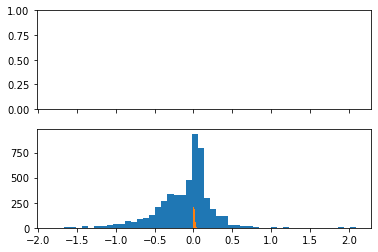

In [29]:
fig, axes = plt.subplots(2, 1, sharex=True)
# axes[0].hist(tsMeasured, bins=50)
# axes[0].hist(t1Measured, bins=50)
axes[1].hist(tsCalculated, bins=50)
axes[1].hist(t1Calculated, bins=50)
plt.show()